# Teletransporte Quântico

### Objetivo

Enviar informação quântica de um qubit em um estado $ \left| \psi \right\rangle $ de uma pessoa para outra. Isso recebe o nome de teleporte quântico devido ao fato de que não se pode copiar o estado de um qubit, de forma que para transmitir esse estado é necessário modificar o qubit original que o tinha.

### Método

Como não é possível copiar um qubit, devemos utilizar outra forma de transferência.

In [3]:
import qiskit as qk
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, Aer
from qiskit.tools.visualization import plot_histogram

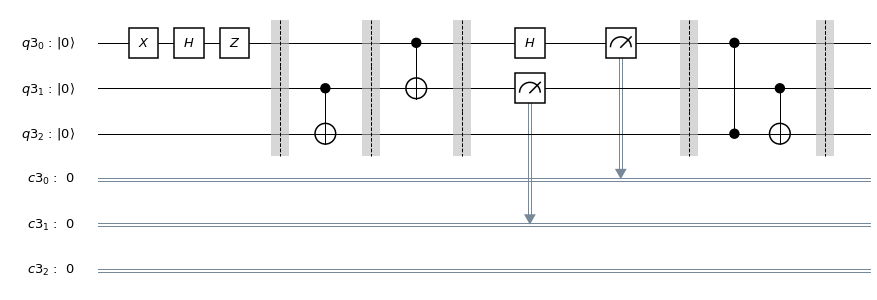

In [7]:
# ------------------------------- Inicializacao --------------------------------------#
"""
 Cria circuito quantico com 3 qubits (0 = bit a ser transferido, 1 = bit intermediario
 do transmissor, 2 = bit do receptor)
"""
q = QuantumRegister(3)

# Bits classicos para guardar os resultados
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

# Define estado do bit a ser transferido (pode ter qualquer operacoes aqui)
qc.x(0)
qc.h(0)
qc.z(0)

qc.barrier()

# ---------------------------------- 1a etapa -----------------------------------------#
"""
    Precisamos emaranhar o bit intermediario do transmissor com o do receptor.
    Para isso, aplicamos um Hadamard em um dos dois qubits para deixa-lo em 
    estado de superposicao e depois aplicamos um cnot com o bit em superposicao
    como controle e o outro como alvo. Com isso, obtemos um estado de emaranhamento 
    pois o valor de um qubit dependera do outro, ja que o controle tem 50% de 
    chance de estar em cada estado e o bit alvo sera alterado apenas se o bit 
    controle for 1. Com isso, os unicos valores possiveis (desconsiderando ruido
    e interferencias) sao |00> e |11> para o par. Isso eh chamado de estado de Bell
    ou Par de Bell (Bell State ou Bell Pair), pois temos que os estados |+> e |->
    sao chamados de Base de Bell (Bell Basis).
"""
qc.cx(1, 2)

qc.barrier()

# ---------------------------------- 2a etapa -----------------------------------------#
"""
    Agora precisamos aplicar um cnot com o bit intermediario do transmissor como alvo
    e com o bit que deseja ser enviado do transmissor como controle. Isso acabara 
    resultando em um estado de emaranhamento entre os 3 qubits, de forma que o valor 
    de cada um depende dos valores dos outros. 
"""
qc.cx(0, 1)

qc.barrier()

# ---------------------------------- 3a etapa -----------------------------------------#
"""
    A seguir, aplicamos um Hadamard no qubit  a ser transferido e realizamos a 
    medicao dos 2 qubits do transmissor.
"""
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

qc.barrier()

# ---------------------------------- 4a etapa -----------------------------------------#
"""
    Por fim, dependendo do resultado das medicoes (que teria que ser transferido 
    classicamente para o receptor), pode ser necessario aplicar alguma operacao
    no qubit do receptor, seguindo a tabela abaixo:
        Medicao         Operacao
        
          00               Nada
          01                X
          10                Z
          11                ZX
    
    Com isso, o bit do receptor se tornou igual ao estado original que queriamos
    transferir do bit do transmissor.
"""
qc.cz(0, 2)
qc.cx(1, 2)

qc.barrier()

qc.draw(output="mpl")
# ---------------------------------- Medicao -----------------------------------------#
"""
    Se a transmissao tiver dado certo, devemos conseguir obter o estado original do
    qubit 2 (recebido) aplicando novamente as transformacoes que foram feitas para
    obter o valor original do qubit a ser enviado, devido a reversibilidade das portas
    quanticas. (Nesse caso o valor original do qubit 2 era |0> porque esse eh o estado
    em que eles comecam)
"""
qc.x(0)
qc.h(0)
qc.z(0)
qc.measure(q[2], c[2])



### Simulando 

{'001': 249, '011': 269, '010': 262, '000': 244}


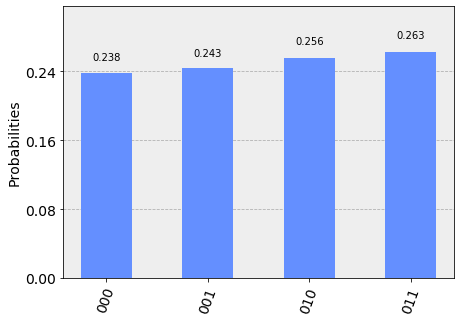

In [8]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

Nesse gráfico, temos que a ordem é c2c1c0. Como podemos ver pelos resultados, o bit c2 (recebido) é sempre 0 como era de se esperar (já que não estamos trabalhando com incoerências nem ruído), o que mostra que o teleporte funcionou.

### Bibliografia:

    Abraham Asfaw, Luciano Bello, Yael Ben-Haim, Sergey Bravyi, Lauren Capelluto, Almudena Carrera Vazquez, Jack Ceroni, Jay Gambetta, Shelly Garion, Leron Gil, Salvador De La Puente Gonzalez, David McKay, Zlatko Minev, Paul Nation, Anna Phan, Arthur Rattew, Javad Shabani, John Smolin, Kristan Temme, Madeleine Tod, James Wootton. "Learn Quantum Computation using Qiskit." (August 2019). 
    Retrieved from http://community.qiskit.org/textbook